In [1]:
# Neural Net Regression Experiment
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../lib")))

from data_load import load_data
from validation import rmse_validation, mae_validation, r2_validation
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# Load data
date_start = pd.to_datetime("2025-04-13 12:00:00 AM")
date_end = pd.to_datetime("2025-04-27 12:00:00 AM")
all_data = load_data(date_start=date_start, date_end=date_end)
garages = [x + " Garage" for x in ["North", "South", "West", "South Campus"]]

In [4]:
# Define model parameters
model_params = {
    'hidden_layer_sizes': (64, 32),
    'max_iter': 1000,
    'random_state': 42
}


Processing North Garage...


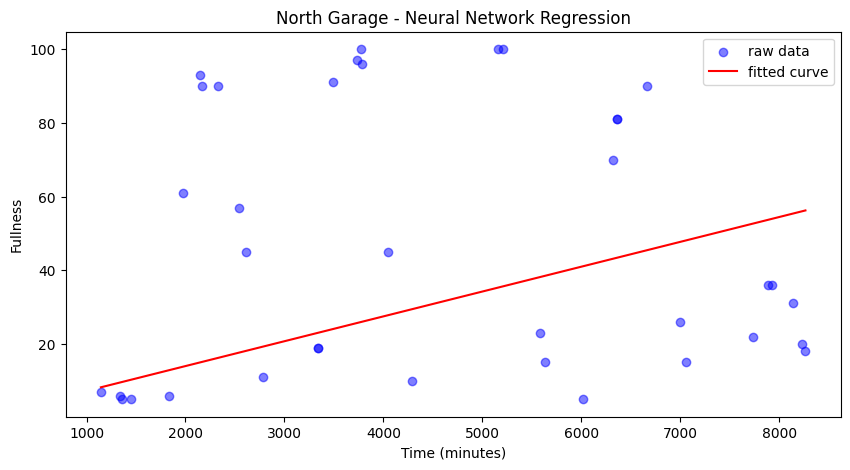


Metrics for North Garage:
RMSE: 41.888253176280635
MAE: 34.25067232047647
R²: -0.40190649071183815

Processing South Garage...


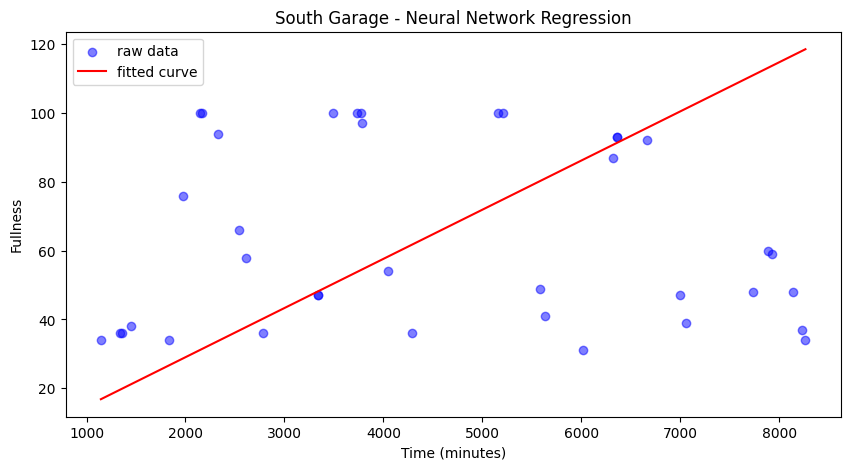


Metrics for South Garage:
RMSE: 43.132487662570995
MAE: 35.07551231295024
R²: -1.7039716369424731

Processing West Garage...


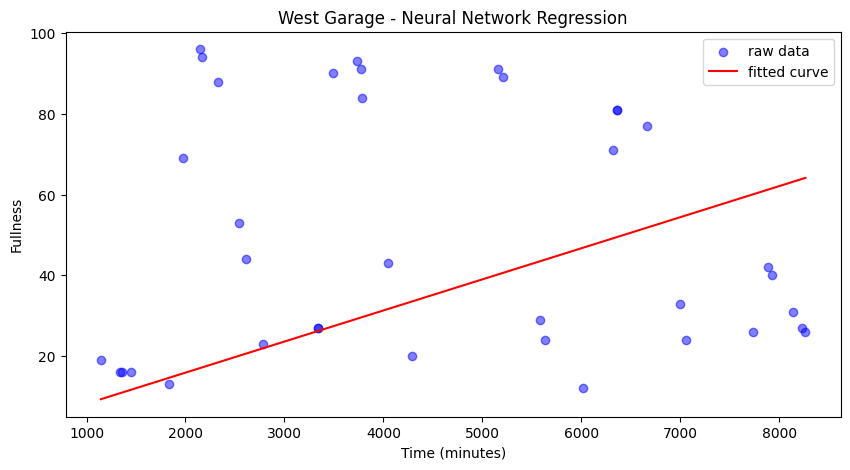


Metrics for West Garage:
RMSE: 38.114083802246334
MAE: 30.90160582311909
R²: -0.6420803837931586

Processing South Campus Garage...


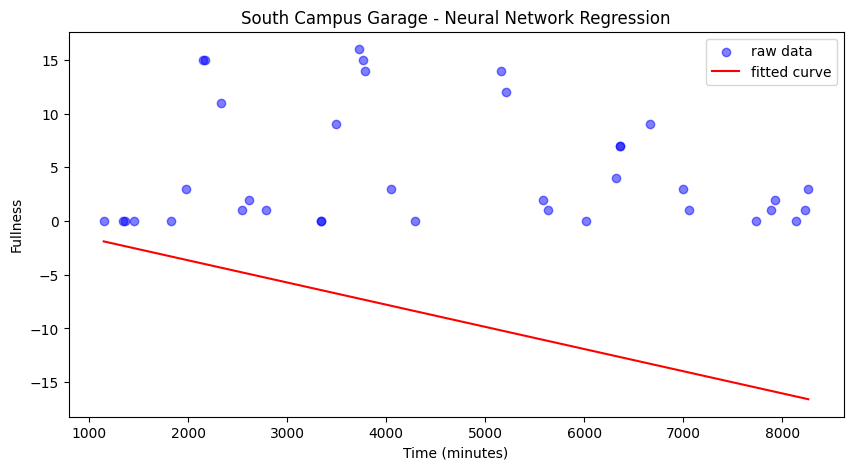


Metrics for South Campus Garage:
RMSE: 15.215856088793684
MAE: 13.607745245022478
R²: -6.659223733721681


In [5]:
# Process each garage
for garage in garages:
    print(f"\nProcessing {garage}...")
    # Get garage data
    garage_data = all_data[all_data['garage name'] == garage]
    
    # Preprocess
    x_data = (garage_data['timestamp'] - date_start).dt.total_seconds() / 60
    y_data = garage_data['fullness']
    
    # Reshape for sklearn
    X = x_data.values.reshape(-1, 1)
    y = y_data.values
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and fit model
    model = MLPRegressor(**model_params)
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Sort for plotting
    sorted_indices = np.argsort(X_test.flatten())
    X_test_sorted = X_test[sorted_indices]
    y_test_sorted = y_test[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]

    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='raw data')
    plt.plot(X_test_sorted, y_pred_sorted, color='red', label='fitted curve')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Fullness')
    plt.title(f'{garage} - Neural Network Regression')
    plt.legend()
    plt.show()
    
    # Calculate metrics
    rmse = rmse_validation(y_test, y_pred)
    mae = mae_validation(y_test, y_pred)
    r2 = r2_validation(y_test, y_pred)
    
    print(f"\nMetrics for {garage}:")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R²: {r2}")
    